<a href="https://colab.research.google.com/github/jpshimidt/DataScience/blob/main/%5BBootCamp%5D06_Aula_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Estatística para Data Science

#### Plano da aula
* Big Picture
* Estatística
    * Tipos de variáveis
    * Medidas de tendência central
    * Medidas de dispersão
    * Medidas de associação
    * Quartis
    * Distribuições
        * Distribuição normal
        * Distribuição normal Padrão
        * Padronização x Normalização x  RobustScaler

#### Principais bibliotecas de visualização de dados do Python
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [Plotly](https://plotly.com/)
* [Bokeh](http://docs.bokeh.org/en/latest/)
* [Yellowbriack](https://www.scikit-yb.org/en/latest/)

#### Principais bibliotecas para análise estatística
* [Statsmodels](https://www.statsmodels.org/stable/index.html)
* [SciPy](https://scipy.org/)

In [ ]:
#!pip install pandas_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions.tratar_dados import *
from functions.data_viz import *
import warnings
# set some options in pandas
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 140)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/enem_1.csv')

In [ ]:
df.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1260588,190002265241,2019,2913606,Ilhéus,29,BA,22.0,M,1,2,1,2927408.0,Salvador,29.0,BA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2913606,Ilhéus,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,5,C,A,B,D,A,A,B,A,B,B,B,A,A,B,A,A,C,A,B,B
1,1286367,190002291020,2019,2927507,Santa Bárbara,29,BA,20.0,F,1,2,1,2927507.0,Santa Bárbara,29.0,BA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2930501,Serrinha,29,BA,1,1,1,1,506.0,507.0,511.0,517.0,"402,8","511,5","516,9","372,1",EEECEDCDDBBCACBCBBBBCBCACECCACBAACECCDBDDDEBA,BCCDAACBBABBECCCCDBACBCCEDDCEAACDCCEABBDEADAB,99999BBAADBCBACBAEDEEACEDBDEECECADCBAEAAACBCED...,CEBBBADCACACBCDCBDACAADDCECAEBBAEEDAAAEBACDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,140.0,120.0,100.0,80.0,"540,0",A,E,A,A,5,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,3177350,190004182039,2019,2911709,Guanambi,29,BA,19.0,F,1,3,1,2911709.0,Guanambi,29.0,BA,2,0,2,1.0,0,29243947.0,2911709.0,Guanambi,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2911709,Guanambi,29,BA,1,1,1,1,503.0,508.0,512.0,515.0,"420,9","446,6","503,8","391,4",DEDDDEDECCCEECBADEAECBEDCBEEEBBBEABDECBDABCEE,CAACCBBADDCBCCABABECAEEBDCEBAACABDCEABEABADAE,99999DBAEAECDABEADDCDCCECADEABEAECAAADDDEBBCDA...,CCAEABDCABBCABEDDDABCDCCAECCEBBCBECAADDADDCEE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,120.0,60.0,"500,0",C,A,A,A,4,B,A,B,D,B,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
3,2918039,190003922718,2019,2906501,Candeias,29,BA,19.0,M,3,4,1,2906501.0,Candeias,29.0,BA,1,1,1,1.0,0,NaN,NaN,Na

In [ ]:
df.shape

(13501, 137)

#### Inspeção dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Columns: 137 entries, ID to Q025 
dtypes: float64(20), int64(71), object(46)
memory usage: 14.1+ MB


In [ ]:
# colunas do dataset
df.columns

Index(['ID', ' NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025 '],
      dtype='object', length=137)

In [ ]:
# dtype de cada coluna
with pd.option_context('display.max_rows', 140, 'display.max_columns', 140):
     display(df.head(3))
     display(df.dtypes)

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1260588,190002265241,2019,2913606,Ilhéus,29,BA,22.0,M,1,2,1,2927408.0,Salvador,29.0,BA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2913606,Ilhéus,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,5,C,A,B,D,A,A,B,A,B,B,B,A,A,B,A,A,C,A,B,B
1,1286367,190002291020,2019,2927507,Santa Bárbara,29,BA,20.0,F,1,2,1,2927507.0,Santa Bárbara,29.0,BA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2930501,Serrinha,29,BA,1,1,1,1,506.0,507.0,511.0,517.0,"402,8","511,5","516,9","372,1",EEECEDCDDBBCACBCBBBBCBCACECCACBAACECCDBDDDEBA,BCCDAACBBABBECCCCDBACBCCEDDCEAACDCCEABBDEADAB,99999BBAADBCBACBAEDEEACEDBDEECECADCBAEAAACBCED...,CEBBBADCACACBCDCBDACAADDCECAEBBAEEDAAAEBACDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,140.0,120.0,100.0,80.0,"540,0",A,E,A,A,5,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,3177350,190004182039,2019,2911709,Guanambi,29,BA,19.0,F,1,3,1,2911709.0,Guanambi,29.0,BA,2,0,2,1.0,0,29243947.0,2911709.0,Guanambi,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2911709,Guanambi,29,BA,1,1,1,1,503.0,508.0,512.0,515.0,"420,9","446,6","503,8","391,4",DEDDDEDECCCEECBADEAECBEDCBEEEBBBEABDECBDABCEE,CAACCBBADDCBCCABABECAEEBDCEBAACABDCEABEABADAE,99999DBAEAECDABEADDCDCCECADEABEAECAAADDDEBBCDA...,CCAEABDCABBCABEDDDABCDCCAECCEBBCBECAADDADDCEE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,120.0,60.0,"500,0",C,A,A,A,4,B,A,B,D,B,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


ID                               int64
 NU_INSCRICAO                    int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                

In [ ]:
# quantidade de valores únicos em cada coluna
df.nunique()

ID                             13501
 NU_INSCRICAO                  13501
NU_ANO                             1
CO_MUNICIPIO_RESIDENCIA          413
NO_MUNICIPIO_RESIDENCIA          413
CO_UF_RESIDENCIA                   1
SG_UF_RESIDENCIA                   1
NU_IDADE                          61
TP_SEXO                            2
TP_ESTADO_CIVIL                    5
TP_COR_RACA                        6
TP_NACIONALIDADE                   5
CO_MUNICIPIO_NASCIMENTO          696
NO_MUNICIPIO_NASCIMENTO          693
CO_UF_NASCIMENTO                  26
SG_UF_NASCIMENTO                  26
TP_ST_CONCLUSAO                    4
TP_ANO_CONCLUIU                   14
TP_ESCOLA                          3
TP_ENSINO                          2
IN_TREINEIRO                       2
CO_ESCOLA                        963
CO_MUNICIPIO_ESC                 351
NO_MUNICIPIO_ESC                 351
CO_UF_ESC                          6
SG_UF_ESC                          6
TP_DEPENDENCIA_ADM_ESC             4
T

In [ ]:
#quais e quantos são municípios da amostra?
df['NO_MUNICIPIO_RESIDENCIA'].unique().size

413

In [ ]:
# lista de municípios de residência dos candidatos
municipios = df['NO_MUNICIPIO_RESIDENCIA'].unique()
municipios.sort()

In [ ]:
# frequência dos candidatos por município de residência
df['NO_MUNICIPIO_PROVA'].value_counts(ascending = False)

Salvador                2997
Feira de Santana         898
Vitória da Conquista     492
Juazeiro                 311
Barreiras                281
                        ... 
Natal                      1
Vila Velha                 1
Araxá                      1
Joinville                  1
Sapezal                    1
Name: NO_MUNICIPIO_PROVA, Length: 214, dtype: int64

In [ ]:
#verifica missing values para cada coluna
((df.isna().sum()/df.shape[0])*100).sort_values(ascending = False)

CO_MUNICIPIO_ESC               82.364269
TP_SIT_FUNC_ESC                82.364269
TP_LOCALIZACAO_ESC             82.364269
TP_DEPENDENCIA_ADM_ESC         82.364269
SG_UF_ESC                      82.364269
CO_UF_ESC                      82.364269
CO_ESCOLA                      82.364269
NO_MUNICIPIO_ESC               82.364269
TP_ENSINO                      37.182431
TX_RESPOSTAS_CN                27.486853
TX_RESPOSTAS_MT                27.486853
NU_NOTA_MT                     27.486853
CO_PROVA_MT                    27.486853
NU_NOTA_CN                     27.486853
TX_GABARITO_MT                 27.486853
CO_PROVA_CN                    27.486853
TX_GABARITO_CN                 27.486853
TX_GABARITO_LC                 23.627879
TP_STATUS_REDACAO              23.627879
TX_RESPOSTAS_CH                23.627879
TX_GABARITO_CH                 23.627879
TX_RESPOSTAS_LC                23.627879
NU_NOTA_COMP2                  23.627879
NU_NOTA_LC                     23.627879
NU_NOTA_CH      

In [ ]:
check_missing(df)

CO_MUNICIPIO_ESC               82.36
TP_SIT_FUNC_ESC                82.36
TP_LOCALIZACAO_ESC             82.36
TP_DEPENDENCIA_ADM_ESC         82.36
SG_UF_ESC                      82.36
CO_UF_ESC                      82.36
CO_ESCOLA                      82.36
NO_MUNICIPIO_ESC               82.36
TP_ENSINO                      37.18
TX_RESPOSTAS_CN                27.49
TX_RESPOSTAS_MT                27.49
NU_NOTA_MT                     27.49
CO_PROVA_MT                    27.49
NU_NOTA_CN                     27.49
TX_GABARITO_MT                 27.49
CO_PROVA_CN                    27.49
TX_GABARITO_CN                 27.49
TX_GABARITO_LC                 23.63
TP_STATUS_REDACAO              23.63
TX_RESPOSTAS_CH                23.63
TX_GABARITO_CH                 23.63
TX_RESPOSTAS_LC                23.63
NU_NOTA_COMP2                  23.63
NU_NOTA_LC                     23.63
NU_NOTA_CH                     23.63
CO_PROVA_LC                    23.63
CO_PROVA_CH                    23.63
N

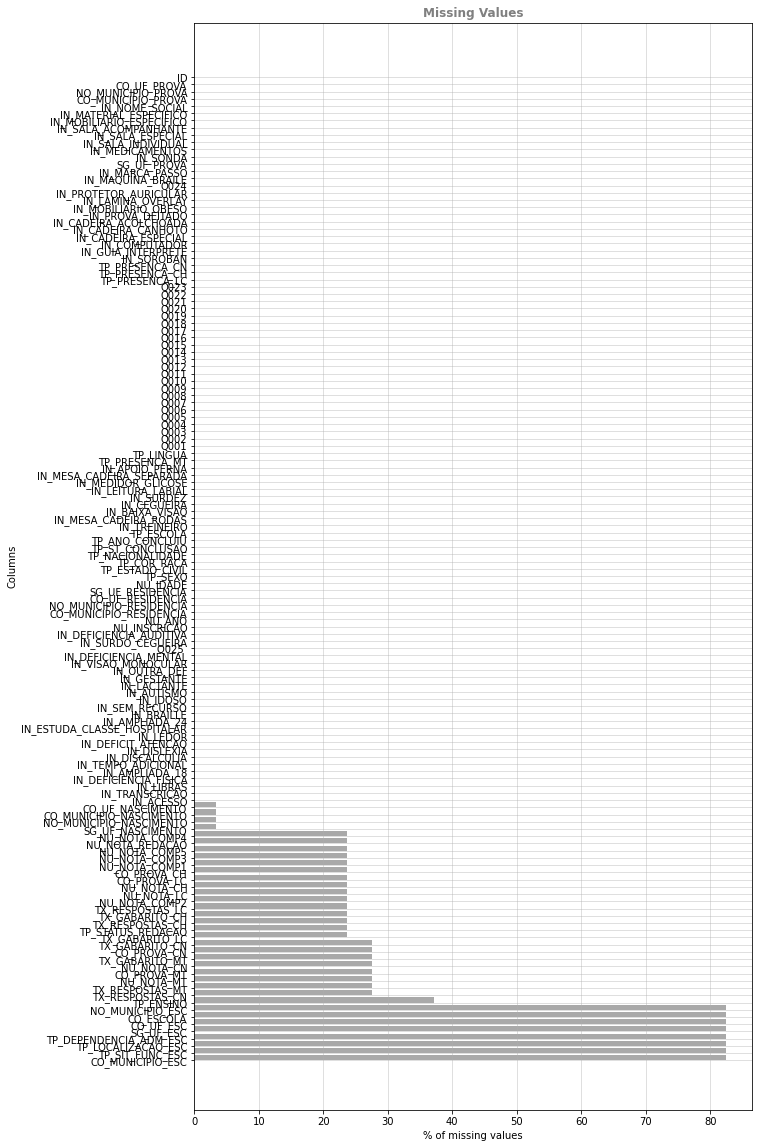

In [ ]:
show_percentage_missing(df)

In [ ]:
# percentual de treineiros
df.IN_TREINEIRO.value_counts(normalize = True)

0    0.880527
1    0.119473
Name: IN_TREINEIRO, dtype: float64

In [ ]:
# caso tivesse espaço: df['IN TREINEIRO'] (ambas as sintaxez fazem a mesma coisa, que é pegar a coluna)

#### Limpeza dos Dados

Vamos agora limpar os dados, o que englobaria etapas como remoção de colunas, tratamento de missing data, verificação de inconsistências, dentre outras possibilidades.

In [ ]:
# checa linhas duplicadas
df.drop_duplicates().shape[0] == df.shape[0]

True

In [ ]:
# drop de colunas que não serão utilizadas na análise
cols = ['ID', ' NU_INSCRICAO', 'NU_ANO' , 'TX_RESPOSTAS_CN',
        'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
        'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
        'TX_GABARITO_MT', 'SG_UF_RESIDENCIA', 'SG_UF_PROVA',
        'CO_PROVA_CH', 'CO_PROVA_LC','CO_PROVA_MT', 'CO_PROVA_CN'
       ]
df.drop(columns = cols, inplace = True)

In [ ]:
# renomeia as colunas 
cols = {
    'Q001': 'escolaridade_pai',
    'Q002': 'escolaridade_mae',
    'Q003': 'ocupacao_pai',
    'Q004': 'ocapacao_mae',
    'Q005': 'pessoas_residencia',
    'Q006': 'renda_mensal_familiar',
    'Q007': 'empregada_domestico',
    'Q008': 'quantidade_banheiros',
    'Q009': 'quantidade_quartos',
    'Q010': 'quantidade_carros',
    'Q011': 'quantidade_moto',
    'Q012': 'geladeira',
    'Q013': 'freezer',
    'Q014': 'maquina_lavar',
    'Q015': 'maquina_secar',
    'Q016': 'microondas',
    'Q017': 'lava_louca',
    'Q018': 'aspirador_po',
    'Q019': 'TV',
    'Q020': 'DVD',
    'Q021': 'TV_assinatura',
    'Q022': 'celular',
    'Q023': 'telefone_fixo',
    'Q024': 'computador',
    'Q025 ': 'internet',
    'TP_DEPENDENCIA_ADM_ESC': 'TIPO_ESCOLA',
    'TP_LOCALIZACAO_ESC':'LOCALIZACAO_ESCOLA',
    'TP_ESCOLA':'TIPO_ESCOLA',
    'NU_NOTA_MT':'MATEMATICA',
    'NU_NOTA_CN':'CIENCIAS_NATUREZA',
    'NU_NOTA_LC':'LINGUAGENS',
    'NU_NOTA_CH':'HUMANAS',
    'NU_NOTA_REDACAO':'REDACAO',
    'IN_TREINEIRO':'TREINEIRO'
}
df.rename(columns = cols, inplace = True)

In [ ]:
#define uma lista das provas que serão analisadas
provas = ['MATEMATICA','CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS','REDACAO']

In [ ]:
np.sort(df['TP_ESTADO_CIVIL'].unique())

array([0, 1, 2, 3, 4])

In [ ]:
df.TP_SEXO.unique()

array(['M', 'F'], dtype=object)

In [ ]:
sex_new_options = {
    'M': 'Masculino',
    'F': 'Feminino'
}

In [ ]:
df.TP_SEXO.map(sex_new_options)

0        Masculino
1         Feminino
2         Feminino
3        Masculino
4        Masculino
           ...    
13496     Feminino
13497    Masculino
13498    Masculino
13499     Feminino
13500    Masculino
Name: TP_SEXO, Length: 13501, dtype: object

In [ ]:
df.TP_SEXO.map({
    'M':1,
    'F':2
})

0        1
1        2
2        2
3        1
4        1
        ..
13496    2
13497    1
13498    1
13499    2
13500    1
Name: TP_SEXO, Length: 13501, dtype: int64

In [ ]:
pd.get_dummies(df.TP_SEXO, drop_first = True)

,M
0,1
1,0
2,0
3,1
4,1
...,...
13496,0
13497,1
13498,1
13499,0


In [ ]:
df.TP_SEXO.unique()

array(['M', 'F'], dtype=object)

In [ ]:
def tratar_sexo(sexo):
    if sexo == 'M':
        return 'Masculino'
    else:
        return 'Feminino'

In [ ]:
df.TP_SEXO.apply(tratar_sexo)

0        Masculino
1         Feminino
2         Feminino
3        Masculino
4        Masculino
           ...    
13496     Feminino
13497    Masculino
13498    Masculino
13499     Feminino
13500    Masculino
Name: TP_SEXO, Length: 13501, dtype: object

In [ ]:
np.sort(df['TP_COR_RACA'].unique())

array([0, 1, 2, 3, 4, 5])

In [ ]:
def editar_cor_raca_2(cor_raca):
    if cor_raca == 0:
        return 'Não informado'
    elif cor_raca == 1:
        return 'Branca'
    elif cor_raca == 2:
        return 'Preta'
    elif cor_raca == 3:
        return 'Parda'
    elif cor_raca == 4:
        return 'Amarela'
    else:
        return 'Indígena'

In [ ]:
df['TP_COR_RACA'].apply(editar_cor_raca_2).value_counts(normalize = True)

Parda            0.514332
Preta            0.278128
Branca           0.153174
Amarela          0.024443
Não informado    0.022739
Indígena         0.007185
Name: TP_COR_RACA, dtype: float64

In [ ]:
df['TP_COR_RACA'].value_counts(1)

3    0.514332
2    0.278128
1    0.153174
4    0.024443
0    0.022739
5    0.007185
Name: TP_COR_RACA, dtype: float64

In [ ]:
# trata as colunas Estado civil, sexo e cor/raça
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply(editar_estado_civil)
df['TP_SEXO'] = df['TP_SEXO'].apply(editar_sexo)
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(editar_cor_raca)

Não iremos analisar as notas dos alunos que tenham faltado algum dia de prova.

In [ ]:
df = df.dropna(how = 'any', subset = provas)

In [ ]:
# verifica a quantidade de missing em cada coluna após a transformação
df.isna().sum()

CO_MUNICIPIO_RESIDENCIA           0
NO_MUNICIPIO_RESIDENCIA           0
CO_UF_RESIDENCIA                  0
NU_IDADE                          0
TP_SEXO                           0
TP_ESTADO_CIVIL                   0
TP_COR_RACA                       0
TP_NACIONALIDADE                  0
CO_MUNICIPIO_NASCIMENTO         349
NO_MUNICIPIO_NASCIMENTO         349
CO_UF_NASCIMENTO                349
SG_UF_NASCIMENTO                349
TP_ST_CONCLUSAO                   0
TP_ANO_CONCLUIU                   0
TIPO_ESCOLA                       0
TP_ENSINO                      3711
TREINEIRO                         0
CO_ESCOLA                      7769
CO_MUNICIPIO_ESC               7769
NO_MUNICIPIO_ESC               7769
CO_UF_ESC                      7769
SG_UF_ESC                      7769
TIPO_ESCOLA                    7769
LOCALIZACAO_ESCOLA             7769
TP_SIT_FUNC_ESC                7769
IN_BAIXA_VISAO                    0
IN_CEGUEIRA                       0
IN_SURDEZ                   

In [ ]:
# agora precisamos tratar as colunas referentes as provas
df[provas].head()

,MATEMATICA,CIENCIAS_NATUREZA,LINGUAGENS,HUMANAS,REDACAO
1,"372,1","402,8","516,9","511,5","540,0"
2,"391,4","420,9","503,8","446,6","500,0"
3,"506,5","339,5","508,0","428,0","860,0"
4,"590,8","482,8","540,3","541,1","720,0"
5,"702,8","594,4","511,3","578,8","820,0"


In [ ]:
df[provas].dtypes

MATEMATICA           object
CIENCIAS_NATUREZA    object
LINGUAGENS           object
HUMANAS              object
REDACAO              object
dtype: object

In [ ]:
for prova in provas:
    df[prova] = df[prova].str.replace(',', '.').astype(float)

In [ ]:
df[provas].dtypes

MATEMATICA           float64
CIENCIAS_NATUREZA    float64
LINGUAGENS           float64
HUMANAS              float64
REDACAO              float64
dtype: object

In [ ]:
# checa inconsistência nas colunas
df[provas].describe()

,MATEMATICA,CIENCIAS_NATUREZA,LINGUAGENS,HUMANAS,REDACAO
count,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000
mean,501.515168,465.591971,510.823259,495.963007,561.980746
std,99.317280,71.982172,62.860211,79.039739,180.214996
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,423.400000,410.500000,472.700000,436.600000,480.000000
50%,479.700000,456.400000,515.200000,495.550000,580.000000
75%,563.400000,514.100000,554.500000,553.900000,660.000000
max,953.400000,749.400000,720.500000,771.900000,980.000000


Agora que limpamos os dados, a partir dos principais problemas, vamos carregar os outros arquivos csv e em seguida utilizar uma função criado no nosso pacote para tratar os dados. Note que a referida função encapsula todas as etapas de código anterior.

In [ ]:
data = pd.DataFrame()
for i in range(1, 4):
    df = pd.read_csv(f'data/enem_{i}.csv')
    data = pd.concat([data, df])
# nota: na aula 3 iremos aprender outra forma de iterar em pasta/arquivos com python

In [ ]:
# aplica a função de tratamento dos dados
df = tratar_dados(data)

In [ ]:
df.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TIPO_ESCOLA,TP_ENSINO,TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TIPO_ESCOLA,LOCALIZACAO_ESCOLA,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CIENCIAS_NATUREZA,HUMANAS,LINGUAGENS,MATEMATICA,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,REDACAO,escolaridade_pai,escolaridade_mae,ocupacao_pai,ocapacao_mae,pessoas_residencia,renda_mensal_familiar,empregada_domestico,quantidade_banheiros,quantidade_quartos,quantidade_carros,quantidade_moto,geladeira,freezer,maquina_lavar,maquina_secar,microondas,lava_louca,aspirador_po,TV,DVD,TV_assinatura,celular,telefone_fixo,computador,internet
1,2927507,Santa Bárbara,29,20.0,Feminino,Solteiro (a),Preta,1,2927507.0,Santa Bárbara,29.0,BA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2930501,Serrinha,29,1,1,1,1,402.8,511.5,516.9,372.1,1,1.0,100.0,140.0,120.0,100.0,80.0,540.0,A,E,A,A,5,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,2911709,Guanambi,29,19.0,Feminino,Solteiro (a),Parda,1,2911709.0,Guanambi,29.0,BA,2,0,2,1.0,0,29243947.0,2911709.0,Guanambi,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2911709,Guanambi,29,1,1,1,1,420.9,446.6,503.8,391.4,1,1.0,100.0,120.0,100.0,120.0,60.0,500.0,C,A,A,A,4,B,A,B,D,B,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
3,2906501,Candeias,29,19.0,Masculino,Divorciado (a),Amarela,1,2906501.0,Candeias,29.0,BA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2906501,Candeias,29,1,1,1,1,339.5,428.0,508.0,506.5,0,1.0,160.0,200.0,160.0,180.0,160.0,860.0,D,C,C,B,4,G,A,B,C,B,A,B,B,A,A,A,A,A,B,B,A,A,B,A,B
4,2910800,Feira de Santana,29,17.0,Masculino,Solteiro (a),Preta,1,2910800.0,Feira de Santana,29.0,BA,2,0,2,1.0,0,29093317.0,2910800.0,Feira de Santana,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,1,1,1,1,482.8,541.1,540.3,590.8,0,1.0,120.0,160.0,120.0,140.0,180.0,720.0,E,G,D,D,5,G,A,B,C,B,B,B,A,B,A,B,A,A,C,A,B,E,A,C,B
5,2927408,Salvador,29,16.0,Masculino,Solteiro (a),Parda,1,2927408.0,Salvador,29.0,BA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2927408,Salvador,29,1,1,1,1,594.4,578.8,511.3,702.8,0,1.0,160.0,180.0,160.0,180.0,140.0,820.0,E,G,F,D,3,J,A,E,E,C,A,B,B,B,A,B,A,A,C,A,B,D,B,C,B


In [ ]:
df.shape

(21756, 120)

#### Análise Estatística

In [ ]:
# filtra os dados para a condição de Treineiro
treineiro = df.query('TREINEIRO == 1')

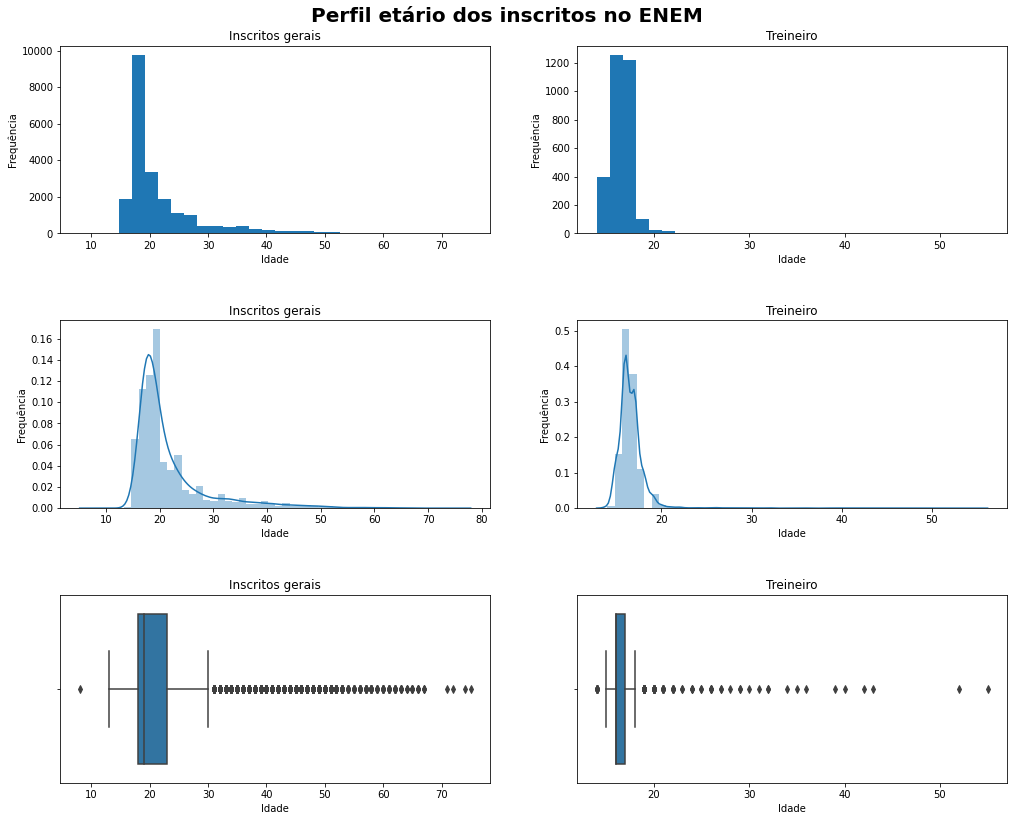

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (15, 12))
# título da figura
fig.suptitle('Perfil etário dos inscritos no ENEM', 
             fontsize = 20, fontweight = 'bold')
# insere um histograma da idade no eixo ax[0,0]
ax[0, 0].hist(df['NU_IDADE'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[0, 0].set(xlabel = 'Idade', ylabel = 'Frequência')
ax[0, 0].set_title('Inscritos gerais')
# insere um histograma para a idade dos treineiros no eixo ax[0,1]
ax[0, 1].hist(treineiro['NU_IDADE'], bins = 30)
# altera os labels do eix[0,1]
ax[0, 1].set(xlabel = 'Idade', ylabel = 'Frequência')
ax[0, 1].set_title('Treineiro')
# distribuição da idade dos inscritos gerais no eixo ax[1,0] e altera os labels
sns.distplot(df['NU_IDADE'], ax = ax[1, 0])
ax[1, 0].set(xlabel = 'Idade', ylabel = 'Frequência', title = 'Inscritos gerais');
# distribuição da idade dos treineiros nos eixo ax[1,1] e altera os labels
sns.distplot(treineiro['NU_IDADE'], ax = ax[1, 1])
ax[1, 1].set(xlabel = 'Idade', ylabel = 'Frequência', title = 'Treineiro')
# boxplot da idade no eixo ax[2,0] e altera os labels
sns.boxplot(data = df, x = 'NU_IDADE', ax = ax[2, 0])
ax[2, 0].set(xlabel = 'Idade', title = 'Inscritos gerais')
# boxplot da idade no eixo ax[2,1] e altera os labels
sns.boxplot(data = treineiro, x = 'NU_IDADE', ax = ax[2, 1])
ax[2, 1].set(xlabel = 'Idade', title = 'Treineiro')
plt.tight_layout(pad = 4)

In [ ]:
# cria uma coluna de média das provas do ENEM
df['MEDIA'] = df[provas].mean(axis = 1)

In [ ]:
df['NU_IDADE'].describe()

count    21756.000000
mean        21.751793
std          7.214912
min          8.000000
25%         18.000000
50%         19.000000
75%         23.000000
max         75.000000
Name: NU_IDADE, dtype: float64

In [ ]:
# estatística descritiva das provas
df[provas].describe()

,MATEMATICA,CIENCIAS_NATUREZA,LINGUAGENS,HUMANAS,REDACAO
count,21756.000000,21756.000000,21756.000000,21756.000000,21756.000000
mean,500.659276,465.627822,510.893491,495.981265,564.259974
std,98.674995,71.629703,62.422655,78.945841,180.274872
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,423.300000,410.500000,473.300000,437.000000,480.000000
50%,478.350000,456.500000,515.150000,496.300000,580.000000
75%,561.200000,514.400000,554.000000,553.525000,660.000000
max,953.400000,756.500000,720.500000,771.900000,980.000000


In [ ]:
# matriz de correlação
df[provas].corr()

,MATEMATICA,CIENCIAS_NATUREZA,LINGUAGENS,HUMANAS,REDACAO
MATEMATICA,1.000000,0.597010,0.549001,0.561023,0.460619
CIENCIAS_NATUREZA,0.597010,1.000000,0.607140,0.627980,0.484077
LINGUAGENS,0.549001,0.607140,1.000000,0.712521,0.526417
HUMANAS,0.561023,0.627980,0.712521,1.000000,0.508972
REDACAO,0.460619,0.484077,0.526417,0.508972,1.000000


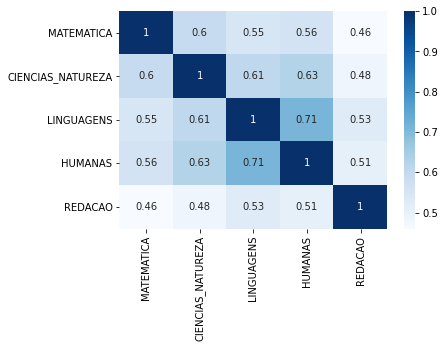

In [ ]:
fig, ax = plt.subplots()
corr_provas = df[provas].corr()
sns.heatmap(corr_provas, annot=True, cmap = 'Blues', ax = ax);

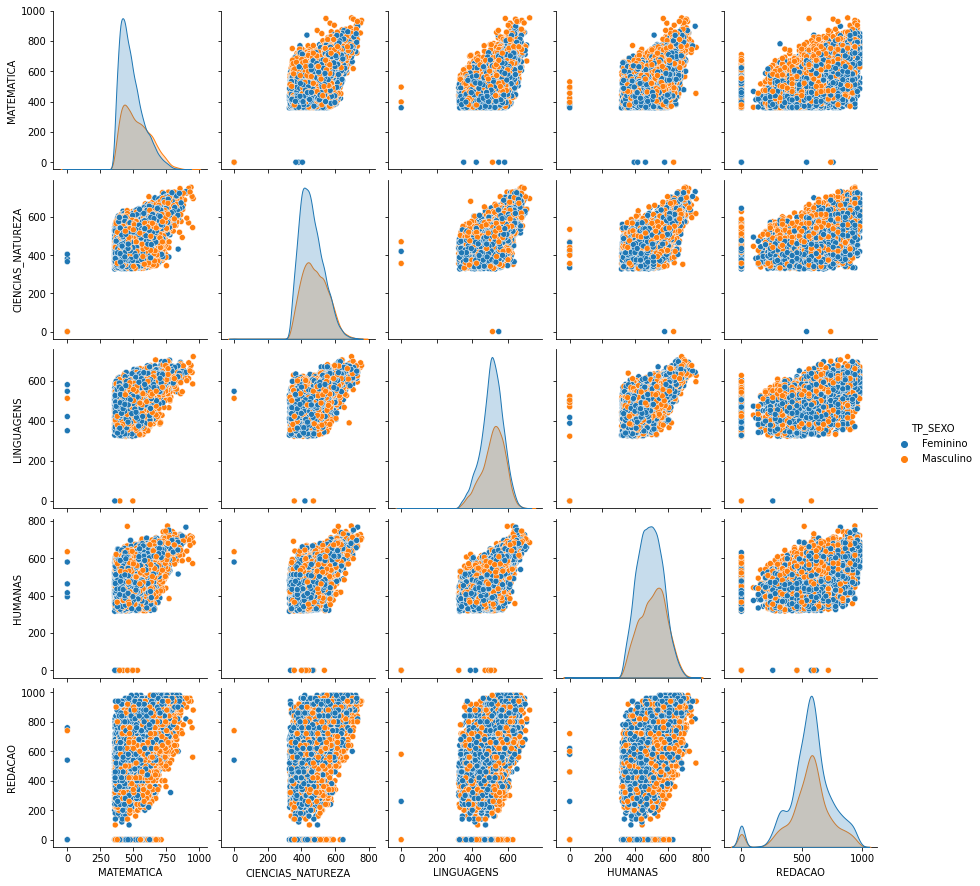

In [ ]:
figure = sns.pairplot(df[provas+['TP_SEXO']], hue = 'TP_SEXO');

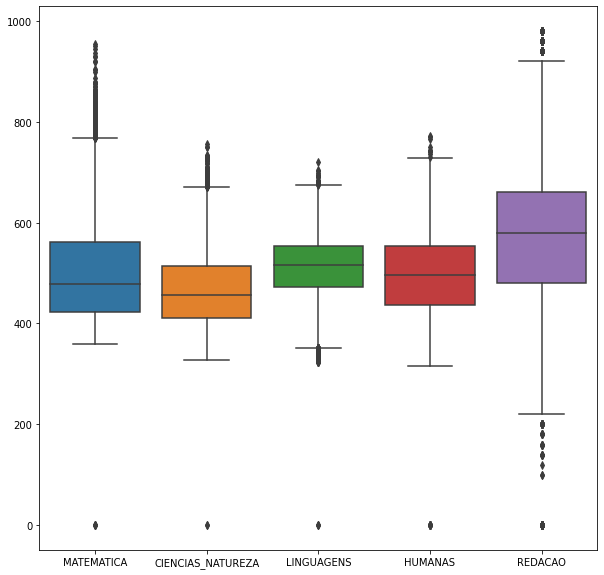

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = df[provas], ax = ax);
# sns.boxplot(data = df[provas], showfliers = False)

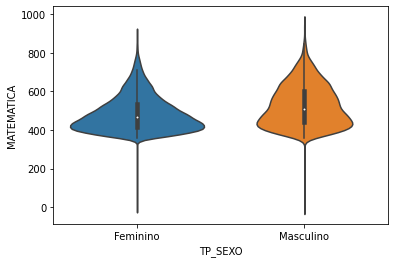

In [ ]:
sns.violinplot(x = 'TP_SEXO', y = 'MATEMATICA', data = df);

In [ ]:
from statsmodels.graphics.gofplots import qqplot

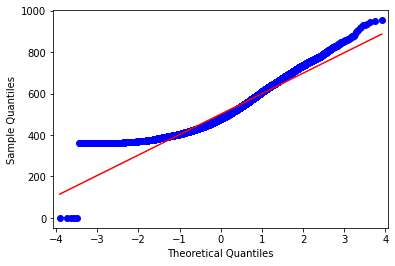

In [ ]:
qqplot(df['MATEMATICA'], line = 's')
plt.show()

Text(0.5, 0.98, 'Distribuição das notas')

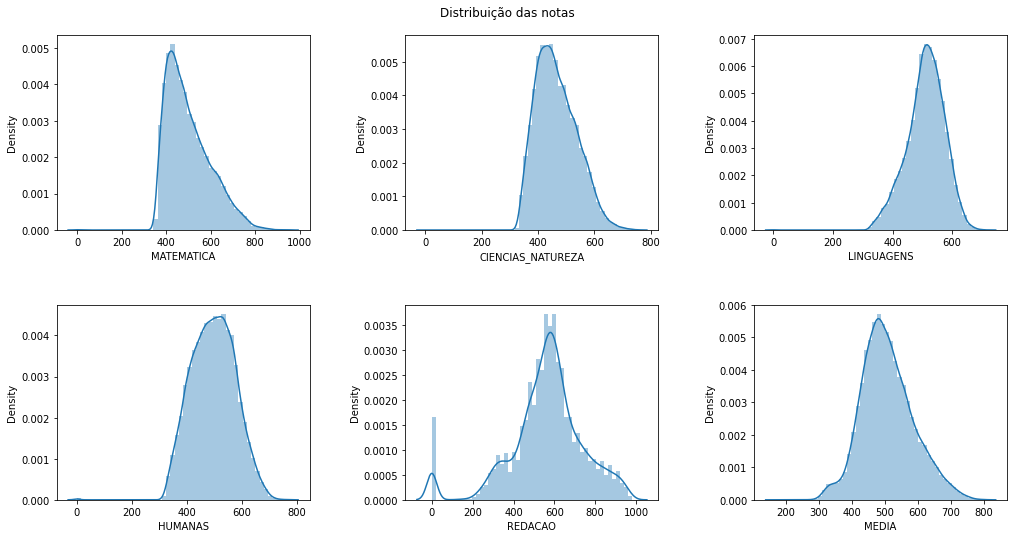

In [ ]:
provas_ = provas+['MEDIA']
index = 0
xlabels = ['Matemática', 'Ciências da Natureza', 'Linguagens',
           'Ciências Humanas', 'Redação', 'Média'
          ]
fig, ax = plt.subplots(2, 3, figsize = (15, 8))
for linha in [0, 1]:
    for coluna in [0, 1, 2]:
        sns.distplot(x = df[provas_[index]], ax = ax[linha, coluna])
        ax[linha, coluna].set(xlabel = provas_[index])
    
        index+=1
    
fig.tight_layout(pad = 4)
fig.suptitle('Distribuição das notas')

In [ ]:
renda_ordenada = df['renda_mensal_familiar'].unique()
renda_ordenada.sort()

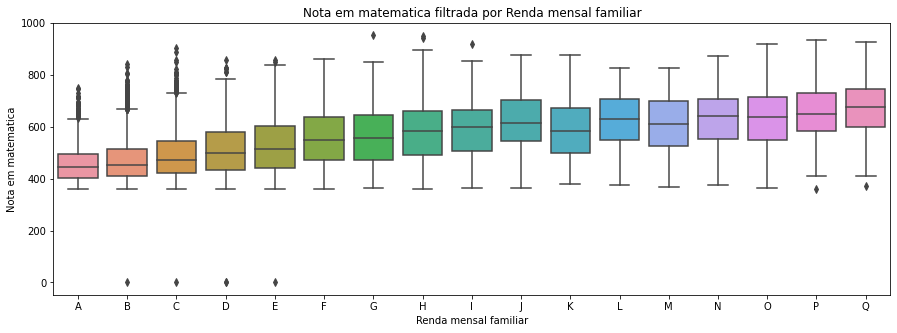

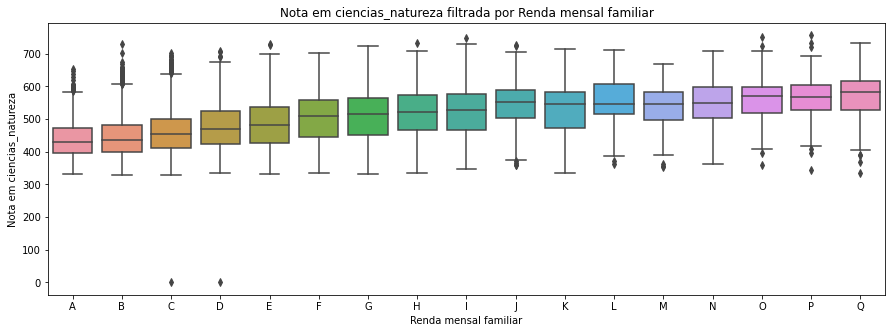

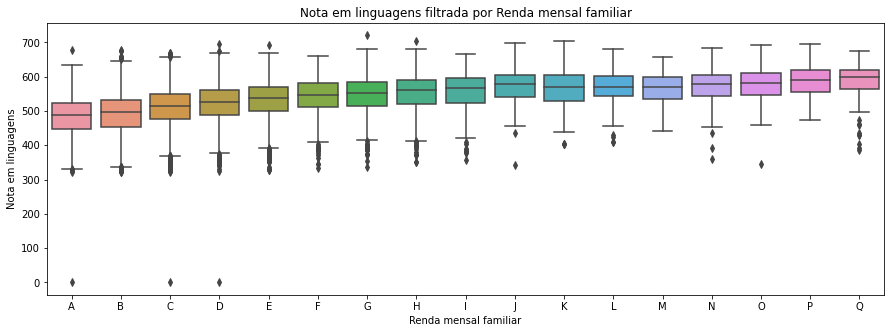

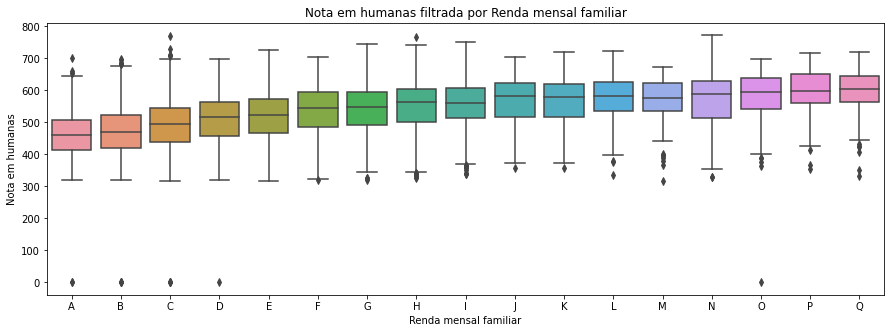

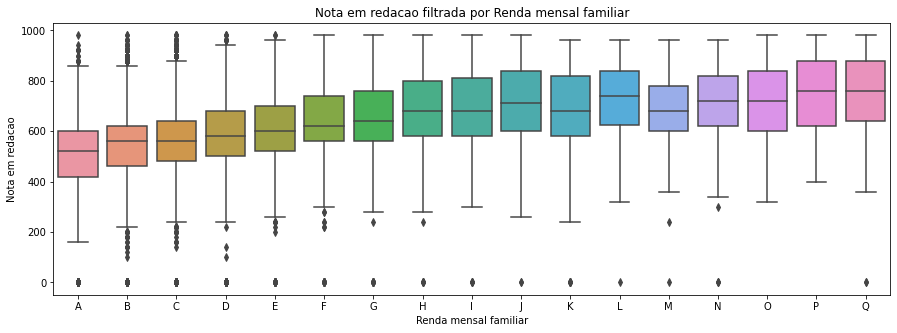

In [ ]:
boxplot_por_filtro('renda_mensal_familiar', df, renda_ordenada)

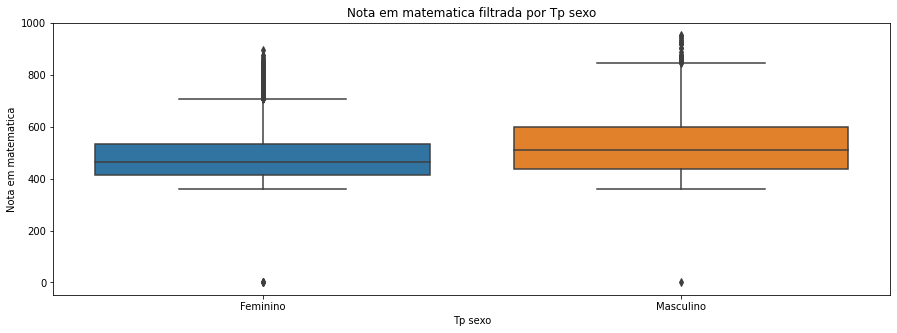

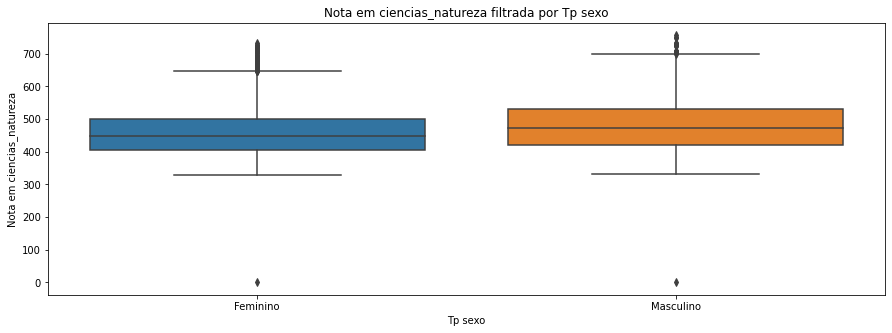

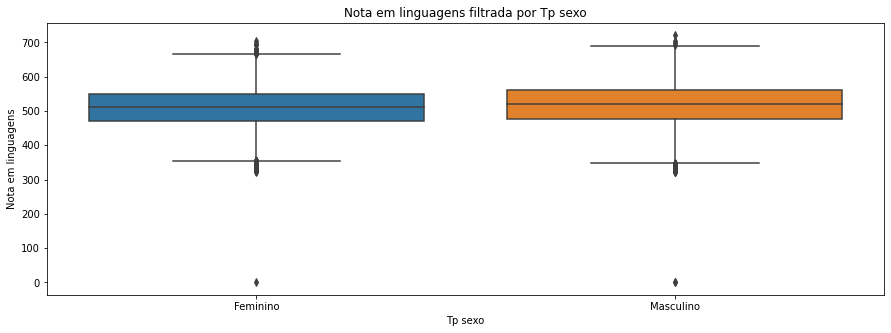

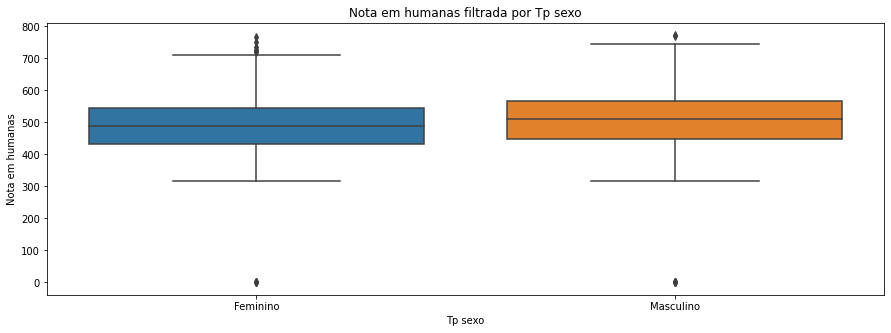

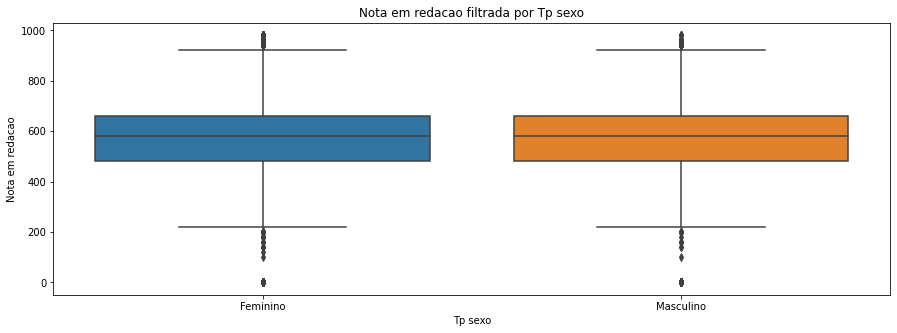

In [ ]:
boxplot_por_filtro('TP_SEXO', df)

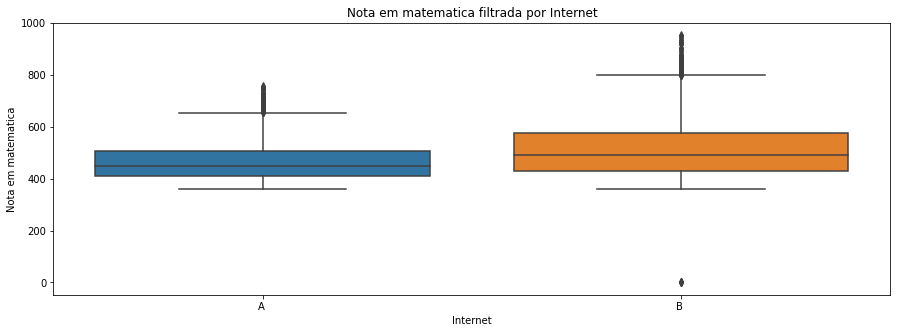

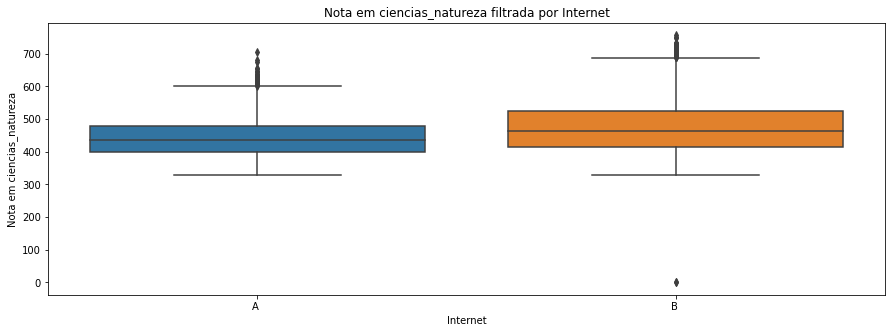

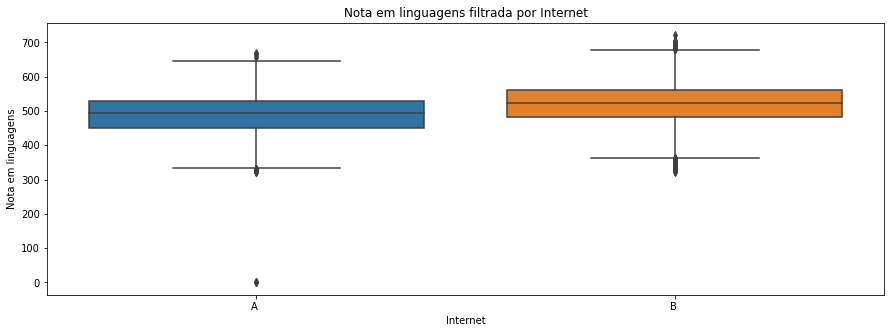

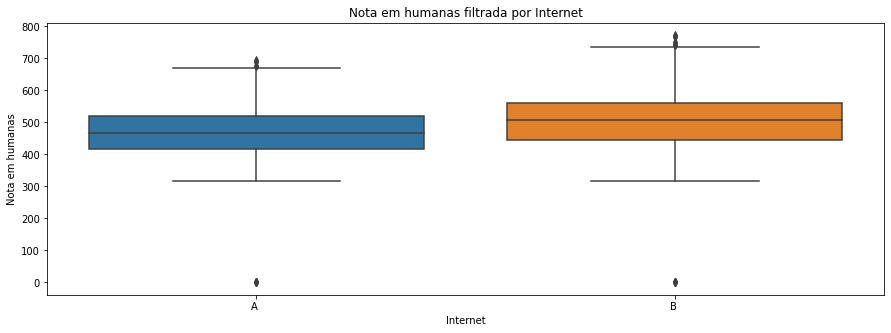

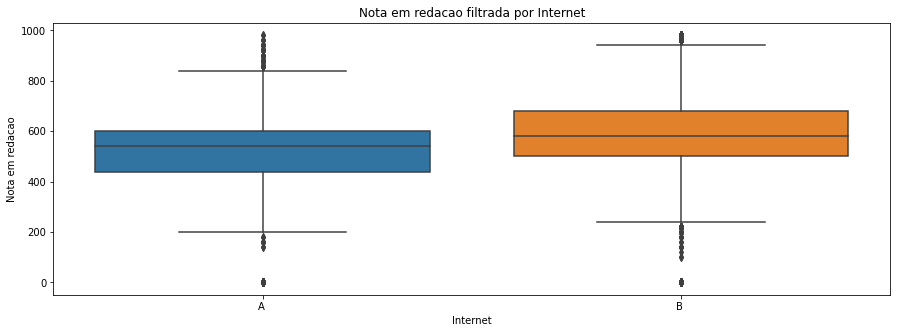

In [ ]:
boxplot_por_filtro('internet', df)

## Estatística (parte teórica)

#### `Qual a importância da Estatística para Data Science?`

Trilha de Estatística para Data Science: https://www.youtube.com/watch?v=969QWwM4vw0&t=1657s

Estatística Básica com Python: https://www.youtube.com/watch?v=K_q6uCgV0Mk&list=PLLWTDkRZXQa8P3JNDLcOZtjyjzRVbPEkI


#### Tipos de variáveis

As variáveis podem ser mensuradas em quatro escalas distintas. As variáveis quantitativas podem ser classificadas em discretas ou contínuas, enquanto que as variáveis qualitativas podem ser agrupadas em nominais ou ordinais.

1. Variáveis qualitativas
* variável nominal: não há qualquer ordenação na distribuição dos dados (ou dentre as categorias).
    * Exemplos: gênero, cor dos olhos,região de procedência, etc.
* variável ordinal: há uma ordem dentre as categorias (escala ordinal).
    * Exemplos: escolaridade/grau de instrução, hierarquia militar, estágio de uma doença, mês de observação, etc.

2. Variáveis quantitativas
* variável discreta: seus valores podem ser oriundos de um conjunto finito ou enumerável (contagem).
    * Exemplos: número de filhos, número de refeições em um dia, etc.
* variável contínua: seus valores pertencem a um intervalo (mensuração).
    * Exemplos: temperatura, preço de uma ação, altura, peso, etc.

#### Medidas de tendência central

Vamos definir medidas para caracterizar o valor central de um conjunto de dados.

Média aritimética populacional

A média aritimética de uma população de $N$ elementos $\left( X_1, X_2, X_3, \dots X_N \right)$, é por definição:

$\mu = \dfrac{X_1+X_2+\dots + X_N}{N}$

Média aritimética amostral

A média amostral é a razão entre a soma dos valores amostrais e o número total de elementos desta amostra, de tamanho $n$.

$ \overline{X}= \dfrac{1}{n}\sum\limits_{i=1}^{n}X_{i}$

In [ ]:
np.random.seed(7)
values = pd.Series(np.random.randint(1, 15, 5))

In [ ]:
values

In [ ]:
values.mean()

Agora vamos inserir um valor extremo:

In [ ]:
values[5] = 350

In [ ]:
values

In [ ]:
values.mean()

Veja como a média aumentou, podemos afirmar que essa média consegue capturar a tendência central desses dados?

Mediana

Exemplo: Vamos calcular a mediana da idade de um conjunto de pessoas. Vamos considerar dois conjuntos:

$A = \{87, 13, 11 , 10, 10\}$<br>
$B = \{23, 31, 17, 18\}$

Para o conjunto A:

$A = \{10, 10, 11, 13 , 87\}$<br>
$Md(A) = 11$

Para o conjunto B:

$B = \{17, 18, 23, 31\}$<br>
$Md(B) = \dfrac{18+23}{2} = 20.5$

In [ ]:
# para o conjunto de dados anterior podemos calcular a mediana:
values.median()

E a moda:

In [ ]:
values.mode()

Moda

A moda refere-se ao valor que ocorre com maior frequência em um conjunto de dados. Podemos ter um conjunto de dados com uma única moda (unimodal),duas modals (bimodal), várias modas (multimodal), ou nenhuma moda (amodal).

Exemplo: Vamos calcular a moda para os conjuntos a seguir:
* $A = \{11, 2,2, 9, 7\}$ : o conjuntem tem uma única moda ($Mo = 2$);
* $B = \{4, 4, 1 9\}$: o conjunto tem uma única moda ($Mo = 4 $);
* $C = \{3, 3, 1, 9, 9\}$: o conjunto tem duas modas ($Mo_1 = 3$ e $Mo_2 = 9$).

#### Medidas de dispersão

As medidas de dispersão buscam mensurar o grau de dispersão de um conjunto de valores em torno da média.

Amplitude

A amplitude corresponde a diferença entre o maior e o menor valor de um conjunto de dados.

Variância populacional

A variância mostra o grau de dispersão de um conjunto de valores em torno do valor central.

A variância populacional de um conjunto de $N$ elementos é o somatório do quadrado dos desvios em relação a média divido pelo tamanho da população.

$\mathrm{\sigma^2}
= \dfrac{\left(X_{1}-\mu\right)^{2}+
\left(X_{2}-\mu \right)^2+ \cdots+
\left(X_{N}-\mu\right)^2
}{N}$

Desvio padrão

O desvio padrão populacional é simplesmente a raiz quadrada da variância populacional:

$\sigma = \sqrt{\sigma^2} = \sqrt{\dfrac{\sum_\limits{i=1}^{N}\left(X_i-\mu\right)^2}{N}}$

#### Medidas de associação

Covariância

A variância conjunta (ou covariância) mensura o grau de interdependência entre duas variáveis aleatórias, como segue.

$\mathrm{cov(X,Y)} = \dfrac{1}{n}\sum\limits_{i=1}^{n}\left( X_{i}-\overline{X} \right)\left(Y_{i}-\overline{Y} \right)$

Correlação

A partir das definições anteriores, podemos mensurar o grau de correlação entre duas variáveis $X$ e $Y$.

$\mathrm{corr(X,Y)}  = \dfrac{\mathrm{cov(X,Y)}}{\mathrm{dp(X)}\mathrm{dp(Y)}}$

* alta correlação não se traduz necessariamente em uma relação de causalidade entre as variáveis;
* os valores podem variar em uma escala de -1 a 1, sendo que valores positivos (negativos) denotam correlação positiva (negativa).

Interpretação dos valores da correlação
![](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?zoom=1.100000023841858&w=1500)

<img src = 'imgs/corr.png'/>

O quer seria uma correlação não linear?

<img src = 'imgs/corr_2.jpg'>

#### Quartis

Bussab e Morettin (2010) ressaltam que tanto a média, quanto o desvio padrão podem não ser medidas suficientes para se representar um conjunto de dados, pois: 
* ambos são afetados de forma demasiada por valores extremos;
* não podemos ter uma noção clara da simetria ou assimetria da distribuição dos dados.

* $q(0,25) = $ 1º Quartil (25% das observações abaixo e 75% das observações acima)
* $q(0,5) =$ 2º  Quartil (50% das observações abaixo e 50% das observações acima)
* $q(0,75) = $ 3º Quartil (75% das observações abaixo e 25% das observações acima)

Então os quartis dividem o conjunto de dados em quatro partes iguais.

<img src = 'imgs/quartil.png' />

Um boxtpot (gráfico de caixa) fornece uma poderosa visualização da distribuição dos dados e valores discrepantes (outliers), sendo formados pelo primeiro quartil, segundo quartil (mediana), terceiro quartil e limites superior e inferior. 

<img src = 'imgs/boxplot.png'/>

***

#### Distribuições 

Distribuição normal
* É amplamente utilizada para modelar diversos tipos de fenômenos.
* Alguns modelos estatísticos podem assumir alguma premissa de que alguma variável do modelo siga uma distribuição normal (regressão linear).
* Com dois parâmetros conseguimos modelar uma distribuição normal: média $\mu$ e desvio padrão $\sigma$.
* Distribuição simétrica em relação à média (média = mediana = moda).

Exemplo: altura da população brasileira.

![](https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png)

Distribuição normal padrão
* Distribuição normal com média 0 e desvio padrão 1.

$$Z = \dfrac{x-\mu}{\sigma}$$

Aplicar a padronização é um procedimento comum em Machine Learning, principalmente em algoritmos que trabalham com distância como o K-Means (Clustering) e o KNN (Abordagem Supervisionada).

Então na prática precisaremos verificar a normalidade das nossas variáveis, ou da nossa variável alvo (ou variável target).

Formas de verificar a normalidade de uma variável:
* Histograma, kdeplot
* Teste de hipótese
* Assimetria (grau de assimetria da distribuição em relação à distribuição normal)
* Curtose (grau de achatamento da curva)

![](https://miro.medium.com/max/521/1*mnaT1JqNbLhb_sSfT4SpkA.jpeg)

O que é uma distribuição assimétrica?

![](https://miro.medium.com/max/660/1*9451kH1-GPqdNyWdehmPeQ.jpeg)

Shapiro-Wilk Test
* Testa se a amostra possui distribuição normal.

Hipóteses do teste:
* $H_0$: a amostra tem uma distribuição normal;
* $H_1$: a amostra não tem uma distribuição normal.

Normalizar x Padronizar x RobustScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
np.random.seed(7)
n = 50

X = pd.DataFrame({'X': np.random.randint(1, 10_000, n),
                  'Z': np.random.randint(1, 30, n)
                 })

In [ ]:
X.describe()

,X,Z
count,50.000000,50.000000
mean,5098.860000,16.440000
std,3027.853028,8.209402
min,93.000000,2.000000
25%,2595.000000,10.500000
50%,5491.000000,16.500000
75%,7630.750000,22.750000
max,9921.000000,29.000000


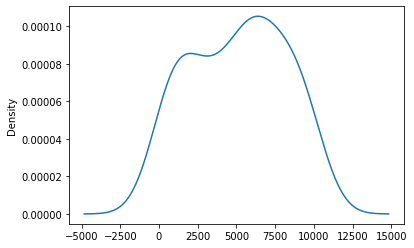

In [ ]:
X.X.plot(kind = 'kde')

MinMaxScaler

$$X_{\text{new}} = \dfrac{X_i-\text{min}(X)}{\text{max}(X)-\text{min}(X)}$$

In [ ]:
normalizar = MinMaxScaler()
X_new_normalizado = pd.DataFrame(normalizar.fit_transform(X), columns = ['X', 'Z'])

O menor valor em cada coluna é 0; e o maior valor é 1.

In [ ]:
X_new_normalizado.describe()

,X,Z
count,50.000000,50.000000
mean,0.509347,0.534815
std,0.308084,0.304052
min,0.000000,0.000000
25%,0.254579,0.314815
50%,0.549247,0.537037
75%,0.766967,0.768519
max,1.000000,1.000000


Padronização
$$Z = \dfrac{X-\mu}{\sigma}$$


In [ ]:
scaler = StandardScaler()
X_new_padronizado = pd.DataFrame(scaler.fit_transform(X), columns = ['X', 'Z'])

Observe que agora nossos dados possuem média 0 e desvio padrão 1.

In [ ]:
X_new_padronizado.describe().round(2)

,X,Z
count,50.00,50.00
mean,0.00,-0.00
std,1.01,1.01
min,-1.67,-1.78
25%,-0.84,-0.73
50%,0.13,0.01
75%,0.84,0.78
max,1.61,1.55


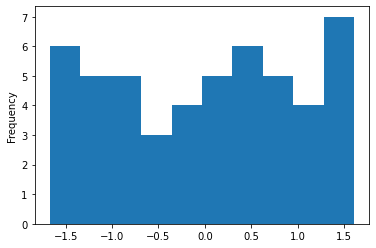

In [ ]:
# vamos verificar o formato do histograma após a transformação:
X_new_padronizado.X.plot(kind = 'hist')

Robust Scaler

$$\dfrac{x_i-Q_1(X)}{Q_3(X)-Q_1(X)}$$

In [ ]:
robust_scaler = RobustScaler()
X_new_robust = pd.DataFrame(robust_scaler.fit_transform(X), columns = ['X', 'Z'])

In [ ]:
X_new_robust.describe()

,X,Z
count,50.000000,50.000000
mean,-0.077871,-0.004898
std,0.601272,0.670155
min,-1.071936,-1.183673
25%,-0.575088,-0.489796
50%,0.000000,0.000000
75%,0.424912,0.510204
max,0.879710,1.020408


Qual o melhor transformador?

Padronizar os dados significa que teremos como retorno uma distribuição normal?

Na prática iremos criar pipelines para considerar os diferentes transformadores e obter aquele gera a melhor performance. 


Algoritmos como KNN e K-Means trabalham com medidas de distância, neste caso teremos que adotar algum pré-processador nos dados para ajustar as escalas.